In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import math
import time

dfCovid = pd.read_csv("COVIDDataScrubbed.csv")
dfnew= dfCovid[['covid_inpatient_bed_utilization','covid_deaths_per_500k']]
dfnew.head()

,covid_inpatient_bed_utilization,covid_deaths_per_500k
0,4.7,177.58
1,3.4,169.66
2,4.7,209.30
3,3.9,216.20
4,5.9,217.60


In [3]:
def distance(a,b):
    distance = 0
    for i in range(len(a)):
        distance += ((a[i] - b[i])**2)
    return distance**(1/2)

def distCent(a,b):
    distance = 0
    for i in range(len(a)):  
        for j in range(len(a[0])):
            distance += ((a[i][j] - b[i][j])**2)
    return distance**(1/2)

def closestCentriod(data,centriods):
    index = -1
    distanc = math.inf
    for num,dat in enumerate(centriods):
        dist = distance(data,dat)
        if dist < distanc:
            index = num
            distanc = dist
    return index,distanc

def naive_kmeans(df, k=4, tol=0.05): 
    #get strating centriod
    centroids = []
    ranCentriod = random.sample(range(0, len(df.index)-1), k)
    for i in range(k):
        cent = list(df.iloc[ranCentriod[i]])
        centroids.append(cent)
    olderror = 0
    error = 0
    iteration = 0
    while True:
        #intialize empty cluster matrix
        clusters = []
        for i in range(k):
            clusters.append([])

        #cluster
        olderror = error
        error = 0
        for i,row in df.iterrows():
            index, d = closestCentriod(row,centroids)
            error += d
            clusters[index].append(list(row))


        #find new centriods
        oldcent = centroids
        centroids = []
        
        for i in clusters:
            if len(i):
                sums = [0] * len(i[0])
                for j in i:
                    for index, dat in enumerate(j):
                        sums[index] += dat
                centr = list(map(lambda x: x/len(i), sums))
                centroids.append(centr)

        if distCent(centroids,oldcent) < tol:
                print('iterations:', iteration)
                return centroids, clusters
        iteration+=1
    return centroids, clusters


In [4]:
means = dfnew.mean()
stds = dfnew.std()

normalized_df = (dfnew - means) / stds
 
normalized_df = normalized_df.fillna(0)
centroids, clusters  = naive_kmeans(normalized_df, k=4, tol=0.001)


iterations: 25


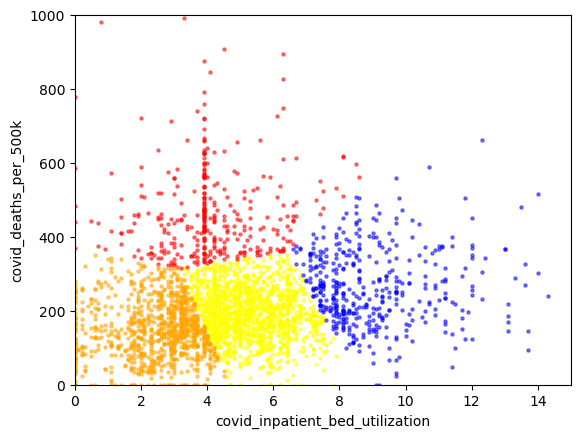

Execution time for K Means Manual Algorithm: 31.650809288024902 seconds


In [8]:
st = time.time()

colorDict = {0:'yellow',1:'blue',2:'red',3:'orange'}
for i in range(len(clusters)):
    color = colorDict[i]
    for j in clusters[i]:
        plt.scatter(j[0]* stds[0] + means[0],j[1]* stds[1] + means[1],c=color, s=5,alpha=0.5)
plt.xlabel('covid_inpatient_bed_utilization')
plt.ylabel('covid_deaths_per_500k')
plt.xlim(0, 15)
plt.ylim(0, 1000)
plt.show()

et = time.time()

elapsed_time = et - st

print('Execution time for K Means Manual Algorithm:', elapsed_time, 'seconds')
